In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm
from konlpy.tag import *

In [2]:
Token = Komoran()

In [ ]:
START_POINT = 300000
END_POINT = 500000
LINK = "https://sports.news.naver.com/news.nhn?oid=082&aid="

def fill_zero(point: int):
    str_point = str(point)
    length = len(str_point)
    zero_seq = ''.join(["0" for _ in range(10 - length)])
    return zero_seq + str_point

def get_parse(item_no: int):
    global LINK
    
    item_str = fill_zero(item_no)
    item_link = LINK + item_str
    
    req = requests.get(item_link)
    return BeautifulSoup(req.text, 'html.parser')

In [ ]:
# total_body: 부산일보에서 스크래핑한 문장 정보를 담고있음.

total_body = pd.DataFrame(columns = ['sentence', 'link', 'type', 'tokenizer'])

for item in tqdm(range(START_POINT, END_POINT)):
    soup = get_parse(item)

    try:
        body = str(soup.select('div.news_end')[0]).split('<br/>')
        body = [text.replace('\n', '').replace('\xa0', ' ') for text in body if '<' not in text and len(text) > 0 and '기자' not in text]
        body = ' '.join(body)
        body = body.split('. ')
        
        if len(body) == 0:
            raise ValueError("Body missing!")
        
        body = pd.DataFrame([body], index = ['sentence']).transpose()
        body['link'] = item
        body['type'] = '부산일보'
        body['tokenizer'] = body['sentence'].apply(lambda x: Token.nouns(x))
        
        total_body = pd.concat([total_body, body])
        
    except Exception as ex:
        pass

In [ ]:
link = 'https://terms.naver.com/entry.nhn'
parse = '#size_ct > p.txt'
total_body_2 = pd.DataFrame()

In [17]:
# total_body_2는 백과사전에서 스크래핑한 문장 정보를 담고있음.
for item in tqdm(range(300000)):
    req = requests.get(f"{link}?docId={item}")
    soup = BeautifulSoup(req.text, 'html.parser')
    crawl = soup.select(parse)
    for tag in crawl:
        try:
            text = tag.text.split('. ')

            body = pd.DataFrame([text], index = ['sentence']).transpose()
            body['link'] = item
            body['type'] = "백과사전"
            body['tokenizer'] = body['sentence'].apply(lambda x: Token.nouns(x))

            total_body_2 = pd.concat([total_body_2, body])
        except Exception as ex:
            print(item)

<ipython-input-17-da21dfc85e1a>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for item in tqdm(range(12034 + 21, 300000)):


12295
12348
12426
12550
12937
13110
13230
13394
13395
13582
13590
14073
14510
14580
14690
14780
14795
14856
15293
15300
15317
15427
15493
15679
15710
15851
16124
16151
16338
16397
16488
16521
16652
16786
16854
16943
17048
17137
17277
17345
17373
17378
17383
17413
17497
17635
17641
17706
17710
18033
18117
18176
18194
18567
18689
18834
18965
19021
19336
19372
19396
19429
19436
19460
19466
19467
19482
19542
19576
19669
19822
20147
20697
20705
20713
77853
123037
138404
146786
174656
177658
181109
245704
247163
252418
253601
257361
257361
270031
277058
281291
281390
281395
281524
282080
282192
282396
282668
283687
284117
284690
284749
284757
284945
285787
285893
285899
285965
286085
286093
287870
289264
291799
291892
291892
291893
292445
292677
292853
292971
292993
293023
293041
293125
293138
293142
293240
293355
293457
293501
293614
293621
293762
293763
293859
293868
293905
293958
294031
294602
294606
294707
294707
294834
294865
294881
294882
294900
294911
295047
295047
295116
295281
29530

In [6]:
total_body

,sentence,link,type,tokenizer
0,1988년과 1989년은 변진섭의 해였다,300000,부산일보,"[1988년, 년, 변진섭, 해]"
1,선한 눈매에 앳된 청년의 모습으로 LP 앞면을 장식했던 그의 첫 앨범 '홀로 된다는...,300000,부산일보,"[눈매, 청년, 모습, 앞면, 장식, 앨범, 홀로 된다는 것, 한국, 가요사, 기념비]"
2,'네게 줄 수 있는 건 오직 사랑뿐' '너무 늦었잖아요' '새들처럼'을 비롯한 수록...,300000,부산일보,"[수, 건, 사랑, 뿐, 새, 수록, 곡, 전부, 귀]"
3,2집도 마찬가지,300000,부산일보,"[집, 마찬가지]"
4,'너에게로 또다시' '숙녀에게' '로라' '우리의 사랑이 필요한 거죠' '희망사항'...,300000,부산일보,"[너에게로 또다시, 숙녀, 로라, 사랑, 필요, 거, 희망사항, 등등, 히트곡]"
...,...,...,...,...
31,집중력과 뇌파의 효과를 활용해 단체 동영상 사격 게임 등 다양한 즐길거리를 개발하고...,325887,부산일보,"[집중력, 뇌파, 효과, 활용, 단체, 동영상, 사격, 게임, 등, 거리, 개발, ..."
32,"강 교수는 ""부산은 물론 전 세계가 항노화 초기 단계여서 이제 막 시장이 열리기 시...",325887,부산일보,"[강, 교수, 부산, 세계, 항, 노화, 초기, 단계, 시장, 시작, 부산, 연구,..."
33,부산에선 강 교수팀 이외에도 여러 대학과 의료계를 중심으로 다양한 항노화 제품 개발...,325887,부산일보,"[부산, 에선, 강, 교수, 팀, 이외, 대학, 의료, 중심, 항, 노화, 제품 개발]"
34,"항노화에 도움을 주는 약물과 식이 프로그램, 항노화 운동 프로그램 등 다양한 연구가...",325887,부산일보,"[항, 노화, 도움, 약물, 식, 프로그램, 항, 노화, 운동, 프로그램, 등, 연..."


In [18]:
total_body_2

,sentence,link,type,tokenizer
0,공공건물을 건축할 때 총비용의 1%를 ‘미적 환경정비’를 위해 사용한다는 시스템,1,백과사전,"[공공건물, 건축, 때, 비용, 미, 환경, 정비, 사용, 시스템]"
1,예컨대 학교·주택·도서관 등에 회화나 조각 등을 비치하거나 붙이는 것 등이다,1,백과사전,"[학교, 주택, 도서관, 등, 회화, 조각, 등, 비치, 것, 등]"
2,1949년 이탈리아가 ‘공공건조물의 재건시 그 경비의 2% 이상을 예술작품의 구입비...,1,백과사전,"[년, 이탈리아, 공공, 건조물, 건시, 경비, 이상, 예술, 작품, 구입비, 할애..."
0,선진국의 개발도상국에의 원조액을 매년 GNP(국민총생산)의 1％에 접근시키려 하는 ...,2,백과사전,"[선진국, 개발도상국, 원조, 액, 국민, 생산, 접근, 것, 1968년, 회, 유..."
1,그러나 여기서 말하는 원조에는 민간투자도 포함되어 있으므로 최근에는 그보다도 ODA...,2,백과사전,"[말, 원조, 민간, 투자, 포함, 최근, 정부개발원조, 비율, 목표, 중, 요시]"
...,...,...,...,...
4,"이와 더불어 전자상거래의 발달, 맞춤형 쇼핑 시대의 개막으로 소비자가 구매하고자 하...",299997,백과사전,"[전자, 상거래, 발달, 맞춤, 쇼핑, 시대, 개막, 소비자, 구매, 상품, 조건,..."
0,다른 나라에서 원재료나 반제품을 수입하여 가공 · 제조해 만든 더 높은 수준의 반제...,299998,백과사전,"[다른 나라에서, 원재료, 제품, 수입, 가공, 제조, 수준, 제품, 완제품, 수출..."
0,국세를 납부기한까지 납부하지 아니한 때에 국세징수법에 의하여 고지세액에 가산하여 징...,299999,백과사전,"[국세, 납부, 기한, 납부, 때, 국세징수법, 고지, 세액, 가산, 징수, 금액,..."
1,"즉, 고지된 납부기한까지 납부하지 않았을 때 부과되는 가산금과 고지된 납부기한 경과...",299999,백과사전,"[고지, 납부, 기한, 납부, 때, 부과, 가산금, 고지, 납부, 기한, 경과, 후..."


In [19]:
train_set = pd.concat([total_body, total_body_2])

In [25]:
from gensim.models import Word2Vec

# W2V를 이용해서 단어들을 모두 grouping 하였음
model = Word2Vec(sentences = train_set['tokenizer'], size = 1000, window = 5, min_count = 3, workers = 4, sg = 0)

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method: inertia 그래프에서 가장 경사가 급격하게 완만해지는 지점을 cluster로 삼는다.
# 여기에서는 40에서 급격하게 완만해지므로 n = 40으로 진행하였음

X = model.wv[model.wv.vocab]
inertia = list()
ran = range(3, 100)
for e in ran:
    kmeans = KMeans(n_clusters = e)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

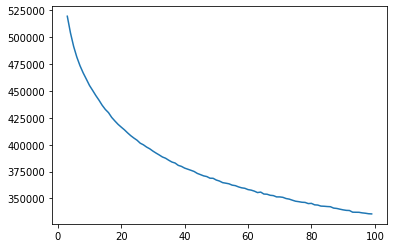

In [37]:
plt.plot(ran, inertia)
plt.show()

In [39]:
fact_k_means = KMeans(n_clusters = 40)
fact_k_means.fit(X)

In [50]:
centroid = fact_k_means.cluster_centers_

In [53]:
# 각 cluster 별로 비슷한 단어끼리 묶였는지 확인하기 위해서 centroid 주변 20개를 각 label마다 output
index = 1
for vec in centroid:
    print(f"INDEX: {index}")
    similarity = model.wv.similar_by_vector(vec, topn = 20)
    print([key for key, value in similarity])
    index += 1

INDEX: 1
['투항', '춘추공양전', '최필립', '최충', '감사원장', '승상', '장수왕', '보장왕', '신숭겸', '비서실장', '총무원장', '총무원', '이희호', '김효재', '강희제', '지엄', '보덕', '하륜', '함순', '천순']
INDEX: 2
['마모', '보일러', '압축', '펌프', '배관', '고압', '코일', '진공', '방열', '모터', '증기', '밸브', '수압', '스팀', '작동', '원심력', '단열', '수증기', '히터', '감속']
INDEX: 3
['한산도', '보성', '범서읍', '안동시', '익산', '충청북도', '마금산', '북서', '산기슭', '서생면', '아미산', '봉산면', '경포대', '사량도', '외동', '문수산', '청도군', '영선동', '북단', '광남로']
INDEX: 4
['일정액', '배당금', '대손충당금', '원리금', '납입', '지급액', '차입금', '원금', '후순위채', '대출금', '보증금', '예치금', '미수금', '예수금', '대여금', '담보물', '잔고', '액수', '상당액', '이표채']
INDEX: 5
['중앙당', '지도부', '야당', '여당', '시당', '민주당', '양당', '창당', '신당', '원내', '탈당', '집행부', '반대파', '이계', '진보신당', '일각', '퇴진', '당직자', '대위', '보선']
INDEX: 6
['금곡대로', '좋은 놈, 나쁜 놈, 이상한 놈', '교우이신', '이주형', '지천명', '길옆', '우백호', '순릉', '김성곤', '프란스', '청암사', '사의 찬미', '살생유택', '음력 7월', '라코닉', '임전무퇴', '해리 리드', '박영철', '계빈', '바커스']
INDEX: 7
['원망', '자식들', '한탄', '꿈속', '아이와', '심정', '외로움', '부지런', '며느리', '큰일', '할아버지', '시댁', '고생', '하루하루', '아빠', '또래', '

In [58]:
import pickle as pkl
# 모델을 다음 위치에 저장 => query_string.py에 쓰임.
with open('./model.pkl', 'wb') as f:
    pkl.dump(model, f)
    pkl.dump(data, f)